In [9]:
# Coffee Sales Analysis

**Author:** Kezia Shiny Pothumudi  
**Project:** IBM AI Developer Final Project  

This project analyzes coffee sales data to uncover patterns in daily sales, sales by coffee type, hourly trends, weekday/weekend differences, and other insights. Exploratory Data Analysis (EDA) and hypothesis testing are used to extract actionable insights.


SyntaxError: invalid syntax (2437146543.py, line 3)

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#visualization
sns.set(style="whitegrid")


In [ ]:
#load dataset
file_path = r"C:\Users\hi\Desktop\Coffe_sales.csv"
df = pd.read_csv(file_path)

# Preview the data
df.head()


In [ ]:
print("Dataset shape:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


In [10]:
# Convert 'Date' column to datetime
df['date'] = pd.to_datetime(df['Date'])

# Strip column names
df.columns = df.columns.str.strip()

# Clean Weekday column
df['Weekday'] = df['Weekday'].str.strip().replace(r'\s+', '', regex=True)

# Verify Weekday values
print(df['Weekday'].unique())


['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']


In [11]:
#Exploratory Data Analysis (EDA)

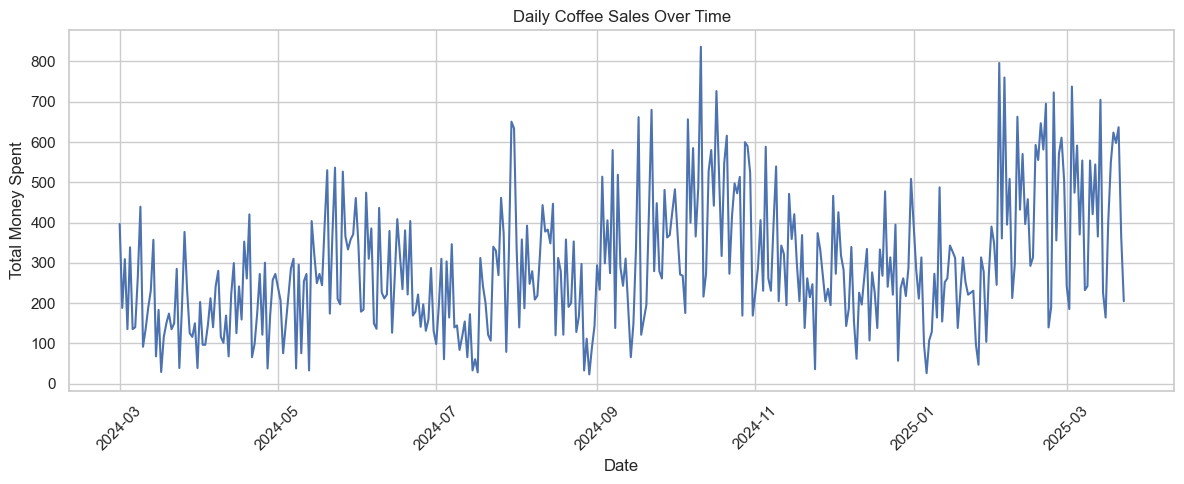

In [24]:
#Daily Total Sales
daily_sales = df.groupby('date')['money'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='money', data=daily_sales)
plt.title('Daily Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



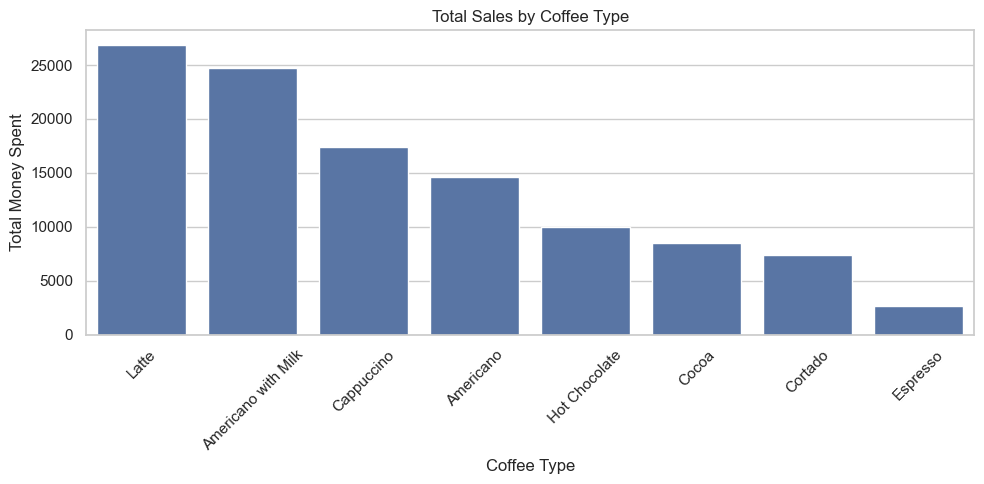

In [13]:
#Sales by Coffee Type
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=coffee_sales.index, y=coffee_sales.values)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



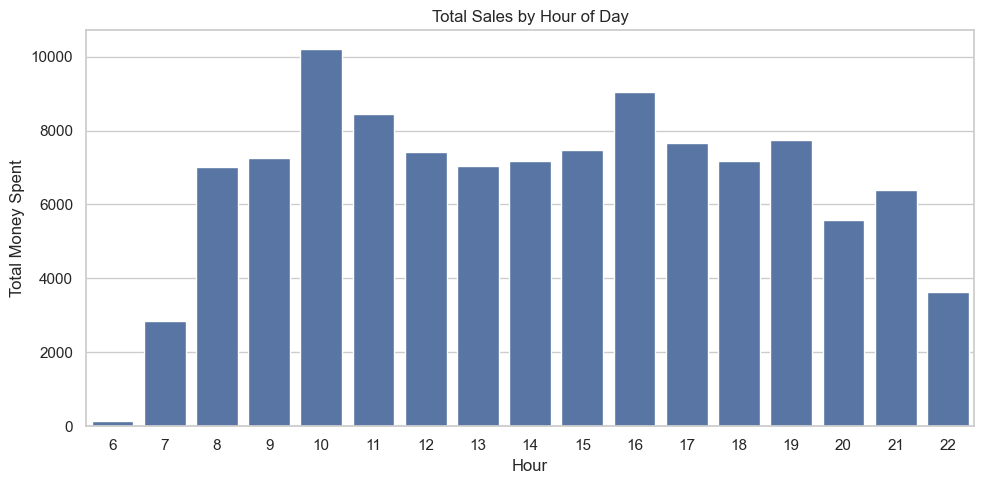

In [14]:
#Sales by Hour of Day
hourly_sales = df.groupby('hour_of_day')['money'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='hour_of_day', y='money', data=hourly_sales)
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Money Spent')
plt.tight_layout()
plt.show()


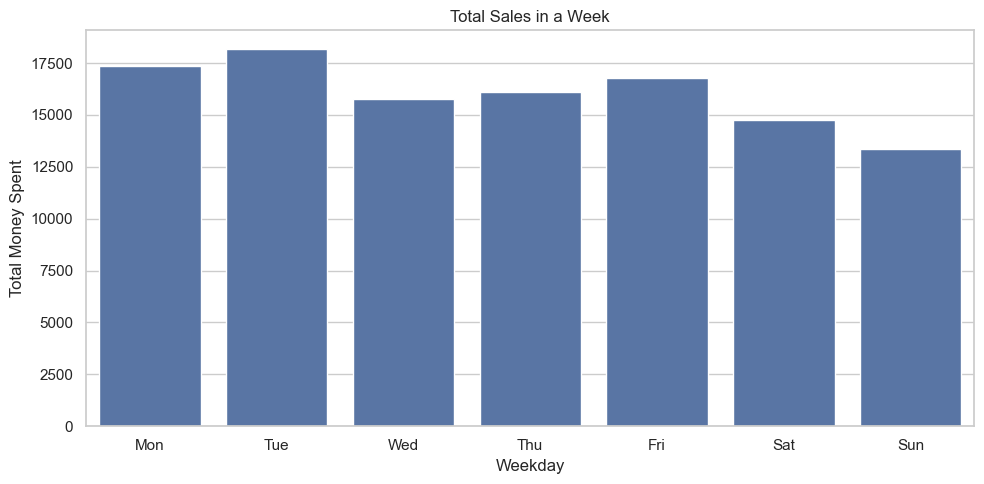

,Weekday,money
1,Mon,17363.10
5,Tue,18168.38
6,Wed,15750.46
4,Thu,16091.40
0,Fri,16802.66
2,Sat,14733.52
3,Sun,13336.06


In [15]:
#Sales by Weekday
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_sales = df.groupby('Weekday')['money'].sum().reset_index()
week_sales['Weekday'] = pd.Categorical(week_sales['Weekday'], categories=week_order, ordered=True)
week_sales = week_sales.sort_values('Weekday')

plt.figure(figsize=(10,5))
sns.barplot(x='Weekday', y='money', data=week_sales)
plt.title('Total Sales in a Week')
plt.xlabel('Weekday')
plt.ylabel('Total Money Spent')
plt.tight_layout()
plt.show()
week_sales



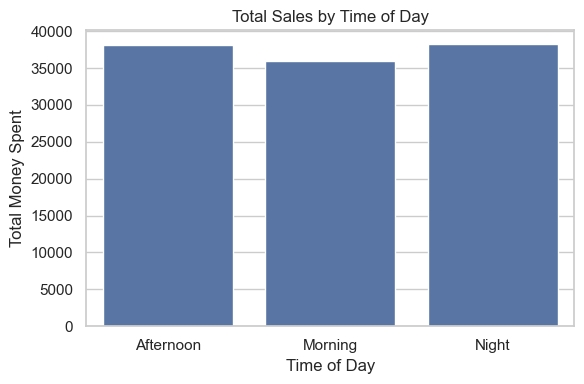

,Time_of_Day,money
0,Afternoon,38130.04
1,Morning,35929.20
2,Night,38186.34


In [16]:
#Sales by Time of Day
timeofday_sales = df.groupby('Time_of_Day')['money'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Time_of_Day', y='money', data=timeofday_sales)
plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Money Spent')
plt.tight_layout()
plt.show()
timeofday_sales


In [17]:
#Feature Engineering
# Weekend indicator
df['IsWeekend'] = df['Weekday'].isin(['Sat', 'Sun'])

# Categorize hours
def categorize_hour(hour):
    if 6<=hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'
df['HourCategory'] = df['hour_of_day'].apply(categorize_hour)

df[['hour_of_day', 'HourCategory', 'Weekday', 'IsWeekend']].head(10)


,hour_of_day,HourCategory,Weekday,IsWeekend
0,10,Morning,Fri,False
1,12,Afternoon,Fri,False
2,12,Afternoon,Fri,False
3,13,Afternoon,Fri,False
4,13,Afternoon,Fri,False
5,15,Afternoon,Fri,False
6,16,Afternoon,Fri,False
7,18,Night,Fri,False
8,19,Night,Fri,False
9,19,Night,Fri,False


In [18]:
#Hypothesis Testing

In [19]:
#Weekend vs Weekday Sales
weekend_sales = df[df['IsWeekend']]['money']
weekday_sales = df[~df['IsWeekend']]['money']

t_stat, p_value = stats.ttest_ind(weekend_sales, weekday_sales)
print("t-statistic:", t_stat)
print("p-value:", p_value)

print("Average weekend sale:", weekend_sales.mean())
print("Average weekday sale:", weekday_sales.mean())

if p_value < 0.05:
    print("Reject null hypothesis: Weekend sales differ from weekday sales")
else:
    print("Fail to reject null hypothesis: No significant difference")


t-statistic: -0.5004864855702297
p-value: 0.6167636384727557
Average weekend sale: 31.57433070866142
Average weekday sale: 31.66892400300978
Fail to reject null hypothesis: No significant difference


In [20]:
#ANOVA: Sales by Time of Day
morning_sales = df[df['Time_of_Day']=='Morning']['money']
afternoon_sales = df[df['Time_of_Day']=='Afternoon']['money']
night_sales = df[df['Time_of_Day']=='Night']['money']

f_stat, p_value = stats.f_oneway(morning_sales, afternoon_sales, night_sales)
print("F-statistic:", f_stat)
print("p-value:", p_value)

print("Average Morning sale:", morning_sales.mean())
print("Average Afternoon sale:", afternoon_sales.mean())
print("Average Night sale:", night_sales.mean())


F-statistic: 78.21775635057196
p-value: 5.738878249433681e-34
Average Morning sale: 30.42269263336156
Average Afternoon sale: 31.6431867219917
Average Night sale: 32.89090439276485


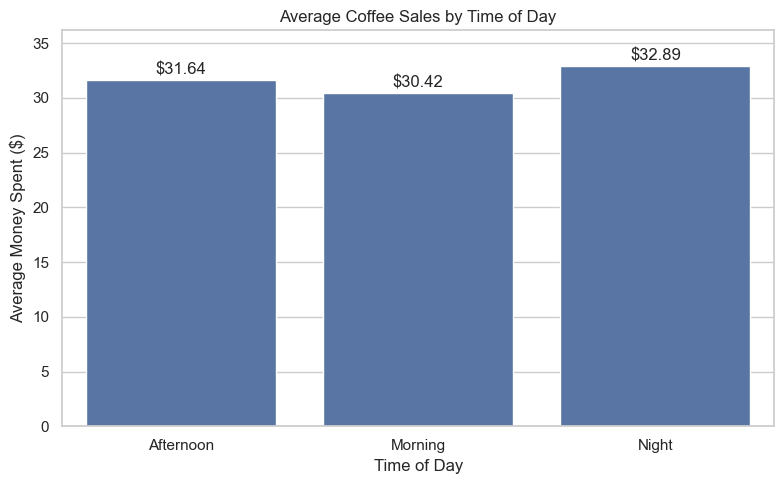

In [21]:
#Average Sales by Time of Day Plot
avg_sales = df.groupby('Time_of_Day')['money'].mean().reset_index()
plt.figure(figsize=(8,5))
colors = ['lightblue' if x != avg_sales['money'].max() else 'orange' for x in avg_sales['money']]
sns.barplot(x='Time_of_Day', y='money', data=avg_sales)

for index, row in avg_sales.iterrows():
    plt.text(index, row.money + 0.5, f"${row.money:.2f}", ha='center')

plt.title('Average Coffee Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Money Spent ($)')
plt.ylim(0, max(avg_sales['money']) * 1.1)
plt.tight_layout()
plt.show()
